# Descripción de Relaciones y Predicciones #



Descripción archivos "breast-level_annotations.csv" y finding_annotations.csv"

- brest-level_annotations.csv: Muestra el diagnostico final de cada mama (2000 en total)
- finding_annotations.csv: Muestra todos los hallazgos individualmente

Vemos una separación de 4.000 exámenes de entrenamiento y 1.000 de testeo. Por exámen tenemos 2 tomas por mama derecha o izquierda y de esta 2 con tomas CC o MLO.

### Descripción de Bi-Rads (Breast Imaging Reporting and Data System) ###

- 0: No concluyente, deben realizarse más estudios para llegar a un diagnóstico final que en la mayoría de los casos la conclusión es normal o benigno.

- 1: Mama normal (negativo), los senos lucen simétricos, no hay masas, estructuras distorsionadas, o calcificaciones que cuasen sospechas.

- 2: Hallazgo benigno, se considera negativo respecto al cáncer, pero hay hallazgo de una masa o abultamiento no canceroso. Tambien puede señalar cambios en una biopsia.

- 3: Hallazgo que puede ser benigno (seguimiento), el resultado en esta categoría tiene una probabilidad muy baja (menor a 2%), se recomienda seguimiento.

- 4: Hallazgo de una anomalía sospechosa en el resultado, hay una sospecha para recomendar una biopsia. Los hallazgos tiene un alto nivel de sospecha.

- 5: Sugerencia de un hallazgo maligno, hay una alta probabilidad de cáncer (95% aprox), se recomienda una biopsia.

- 6: Hallazgo de malignidad, esta categoría se utiliza únicamente para hallazgos en un mamograna que ya se ha demostrado canceroso según una biopsia.

fuente: https://www.cancer.org/es/cancer/tipos/cancer-de-seno/pruebas-de-deteccion-y-deteccion-temprana-del-cancer-de-seno/mamogramas/como-entender-su-informe-de-mamograma.html

Podemos ver que se omiten las clasificaciones "0" y "6", la primera debido a que no pueden ser clasificados y la segunda por que es necesario el diagnóstico de un radiologo.

In [2]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [113]:
archivo = 'finding_annotations.csv'
df = pd.read_csv(archivo)

archivo2 = 'breast-level_annotations.csv'
bla = pd.read_csv(archivo2)

def safe_literal_eval(value):
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return value

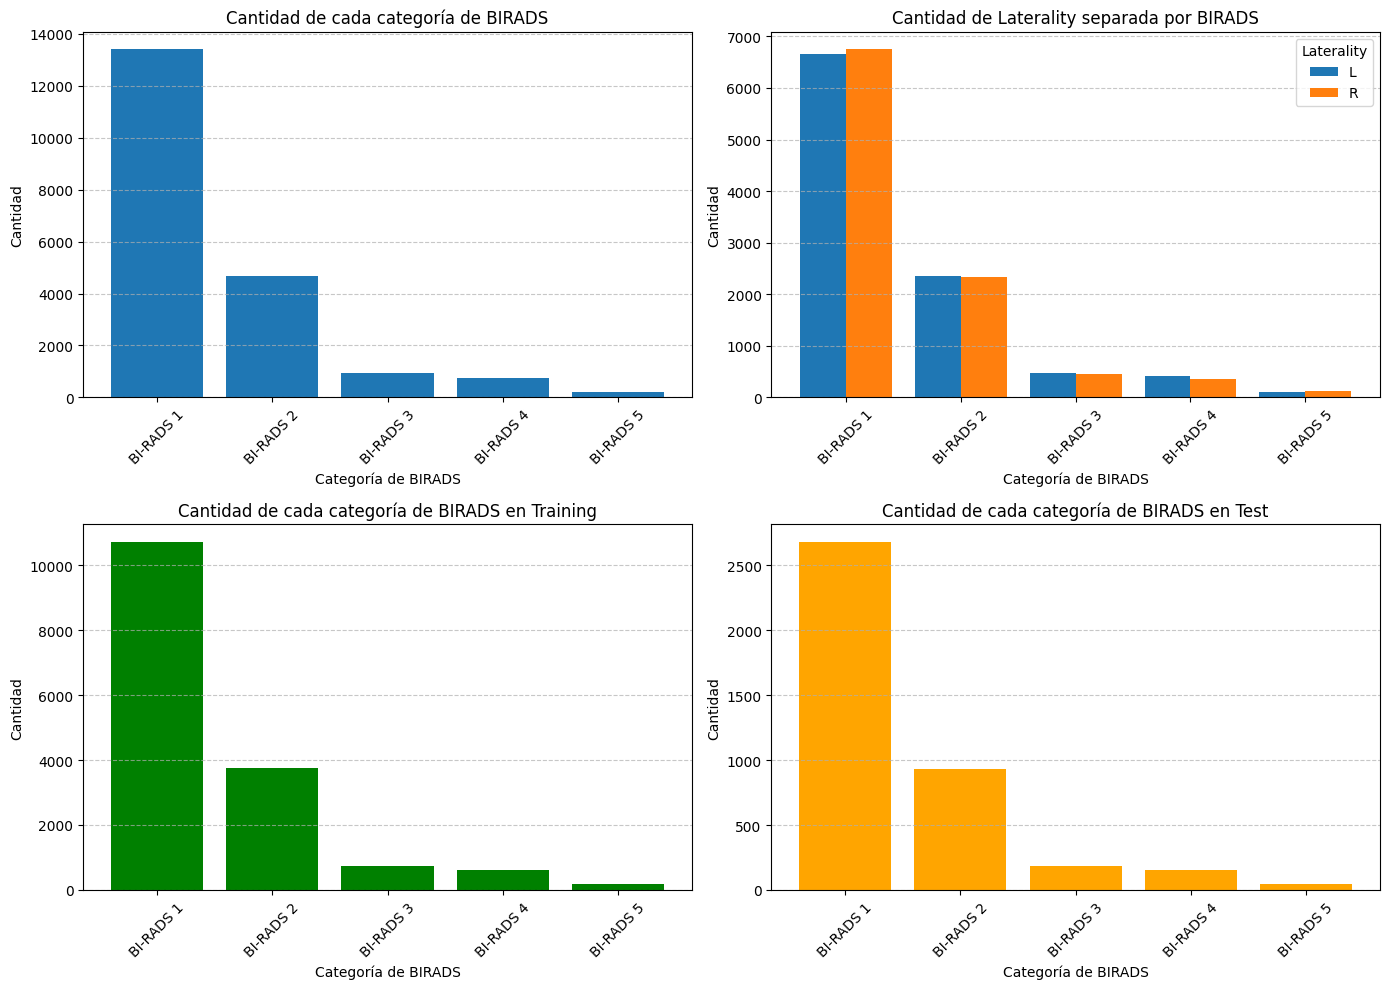

In [25]:
# Configuración de gráficos
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 1
frecuencias_birads = bla['breast_birads'].value_counts()
axs[0, 0].bar(frecuencias_birads.index, frecuencias_birads.values)
axs[0, 0].set_title('Cantidad de cada categoría de BIRADS')
axs[0, 0].set_xlabel('Categoría de BIRADS')
axs[0, 0].set_ylabel('Cantidad')
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# 2
breast_birads_unique = bla['breast_birads'].unique()
laterality_birads = bla.groupby(['breast_birads', 'laterality']).size().unstack().reindex(columns=bla['laterality'].unique(), fill_value=0)
laterality_birads.plot(kind='bar', ax=axs[0, 1], width=0.8)
axs[0, 1].set_title('Cantidad de Laterality separada por BIRADS')
axs[0, 1].set_xlabel('Categoría de BIRADS')
axs[0, 1].set_ylabel('Cantidad')
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].legend(title='Laterality')
axs[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# 3
training_data = bla[bla['split'] == 'training']
frecuencias_birads_training = training_data['breast_birads'].value_counts()
axs[1, 0].bar(frecuencias_birads_training.index, frecuencias_birads_training.values, color='green')
axs[1, 0].set_title('Cantidad de cada categoría de BIRADS en Training')
axs[1, 0].set_xlabel('Categoría de BIRADS')
axs[1, 0].set_ylabel('Cantidad')
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# 4
test_data = bla[bla['split'] == 'test']
frecuencias_birads_test = test_data['breast_birads'].value_counts()
axs[1, 1].bar(frecuencias_birads_test.index, frecuencias_birads_test.values, color='orange')
axs[1, 1].set_title('Cantidad de cada categoría de BIRADS en Test')
axs[1, 1].set_xlabel('Categoría de BIRADS')
axs[1, 1].set_ylabel('Cantidad')
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

#### Relación de las casillas "breast_birads" y "finding_birads" en "findins_annotations.csv" ####

In [26]:
coincidencias = (df['finding_birads'] == df['breast_birads']).sum()
no_coincidencias = (df['finding_birads'] != df['breast_birads']).sum()
print(f'En "findins_annotations.csv"')
print(f'Cantidad de filas con coincidencias: {coincidencias}')
print(f'Cantidad de filas con no coincidencias: {no_coincidencias}')

En "findins_annotations.csv"
Cantidad de filas con coincidencias: 1952
Cantidad de filas con no coincidencias: 18534


#### Relación de BI-RADS detectados por cada BI-RADS diagnosticado ####

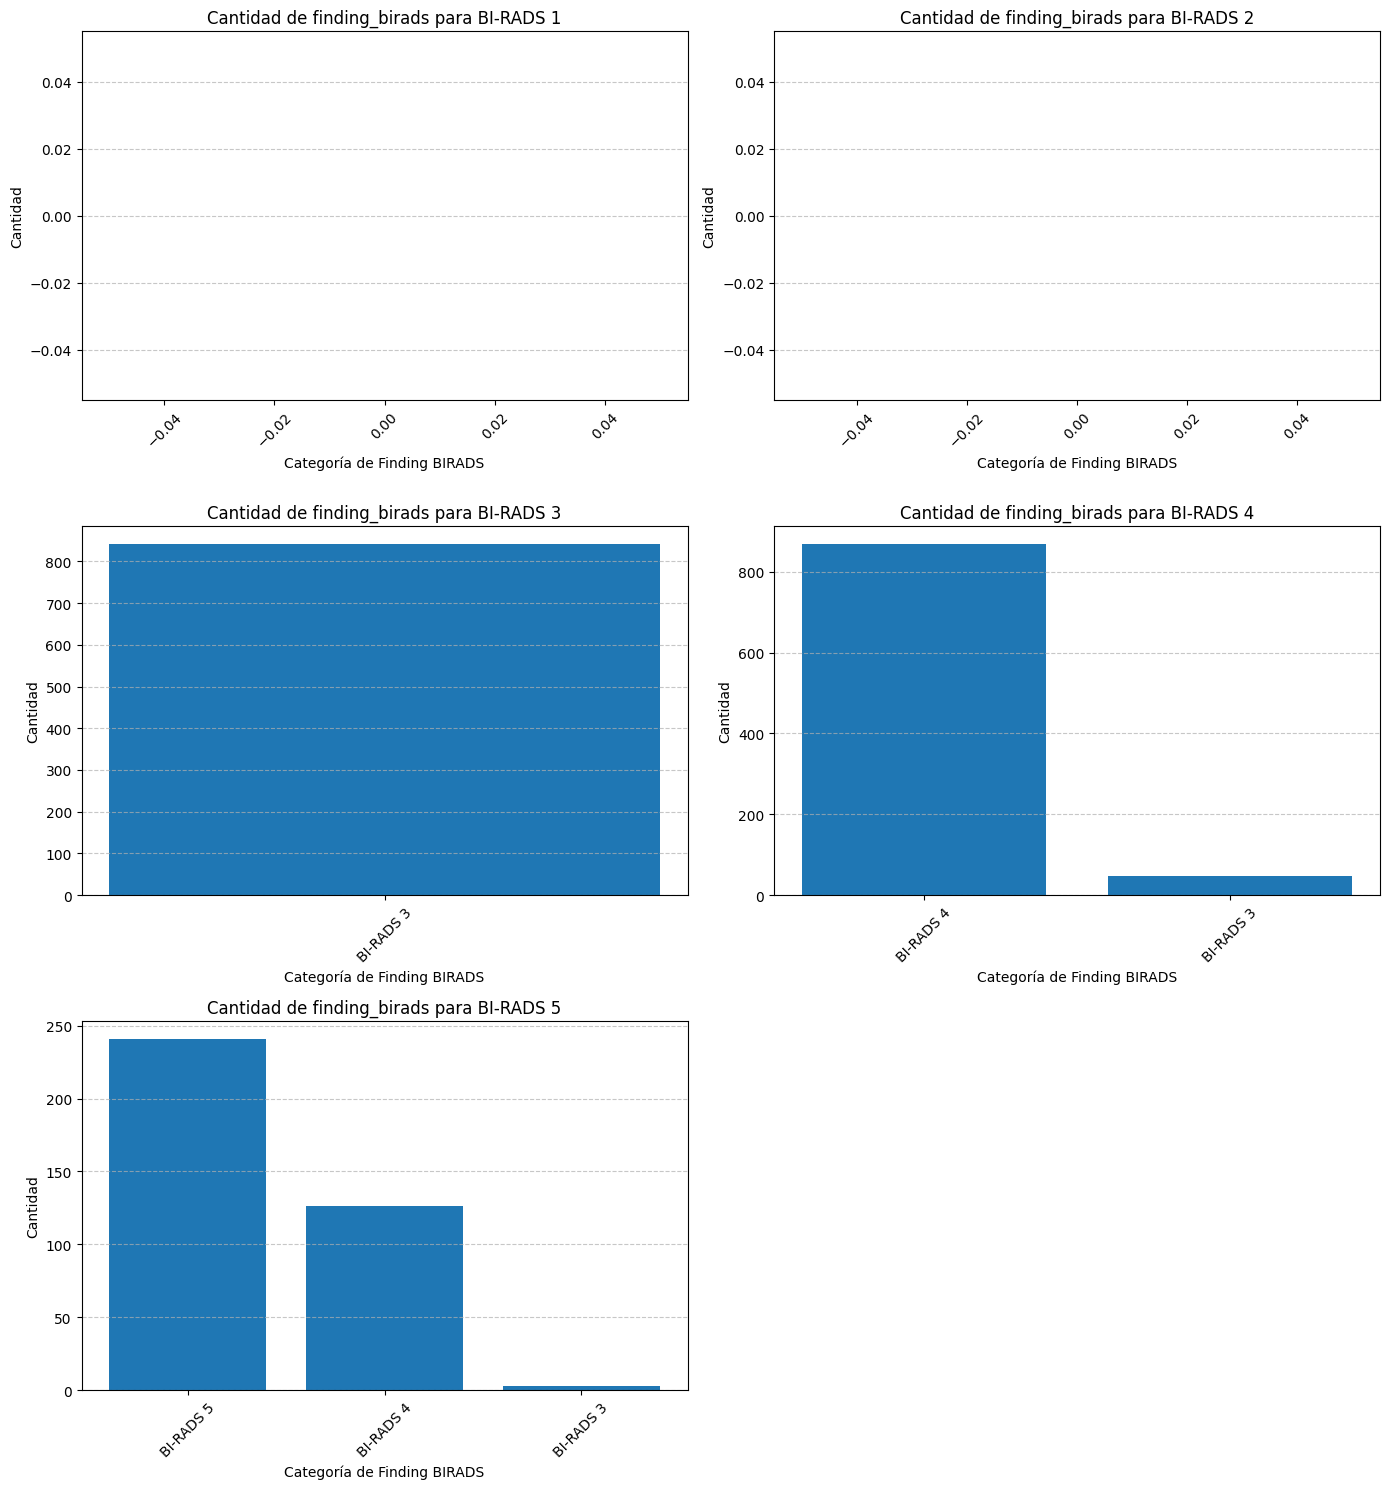

In [34]:
lista_birads = ['BI-RADS 1', 'BI-RADS 2', 'BI-RADS 3', 'BI-RADS 4', 'BI-RADS 5']

fig, axs = plt.subplots(3, 2, figsize=(14, 15))
axs = axs.flatten()  # Aplanar el array de ejes para iterar fácilmente

for i, birads_value in enumerate(lista_birads):
    subset = df[df['breast_birads'] == birads_value]
    finding_birads_counts = subset['finding_birads'].value_counts()
    
    axs[i].bar(finding_birads_counts.index, finding_birads_counts.values)
    axs[i].set_title(f'Cantidad de finding_birads para {birads_value}')
    axs[i].set_xlabel('Categoría de Finding BIRADS')
    axs[i].set_ylabel('Cantidad')
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

fig.delaxes(axs[5])

# Ajustar diseño
plt.tight_layout()
plt.show()

**Obs:**  Podemos observar que solo en las categorías BI-RADS 3, BI-RADS 4 y BI-RADS 5 hay más de una elemento de otra categoría y que no hay elementos de una categoría mayor.

### Relación por Mama ###

Para diagnosticar una mama se debe tener en consideración ambos tipos de mamografias, la MLO (medio-lateral oblicua) y CC (cráneo-caudal), y este diagnóstico debería ser el mismo para ambas imagenes. 

In [21]:
df_sorted = bla[['study_id', 'laterality', 'breast_birads', 'view_position']].sort_values(by='study_id')


total_coincidencias = 0
total_no_coincidencias = 0
detalles_no_coincidencias = []

grouped = df_sorted.groupby(['study_id', 'laterality'])

for (study_id, laterality), group in grouped:
    # Contar las ocurrencias de 'breast_birads' en 'CC' y 'MLO'
    cc_birads = set(group[group['view_position'] == 'CC']['breast_birads'])
    mlo_birads = set(group[group['view_position'] == 'MLO']['breast_birads'])
    
    # Contar coincidencias y no coincidencias
    coincidencias = len(cc_birads & mlo_birads)
    no_coincidencias = len((cc_birads - mlo_birads) | (mlo_birads - cc_birads))
    
    # Actualizar totales
    total_coincidencias += coincidencias
    total_no_coincidencias += no_coincidencias
    
    # Añadir detalles de no coincidencias a la lista
    if no_coincidencias > 0:
        # Filtrar filas que no coinciden
        no_coincide_cc = group[(group['view_position'] == 'CC') & (~group['breast_birads'].isin(mlo_birads))]
        no_coincide_mlo = group[(group['view_position'] == 'MLO') & (~group['breast_birads'].isin(cc_birads))]
        
        # Añadir a la lista de detalles
        detalles_no_coincidencias.extend(no_coincide_cc.to_dict('records'))
        detalles_no_coincidencias.extend(no_coincide_mlo.to_dict('records'))

# Crear DataFrame para los detalles de no coincidencias
df_detalles_no_coincidencias = pd.DataFrame(detalles_no_coincidencias)

# Mostrar el conteo total de coincidencias y no coincidencias
print(f"Total de coincidencias: {total_coincidencias}")
print(f"Total de no coincidencias: {total_no_coincidencias}")

# Mostrar los detalles de las no coincidencias
print("\nDetalles de no coincidencias:")
print(df_detalles_no_coincidencias[['study_id', 'laterality', 'breast_birads', 'view_position']])

Total de coincidencias: 9999
Total de no coincidencias: 1

Detalles de no coincidencias:
                           study_id laterality breast_birads view_position
0  dbca9d28baa3207b3187c4d07dc81a80          L     BI-RADS 2            CC
1  dbca9d28baa3207b3187c4d07dc81a80          L     BI-RADS 2            CC


### Relación BI-RADS por Mama ###

Como vimos anteriormente, solo hay más de una clasifiación en los BI-RADS 3, 4 y 5, entonces acotaremos nuestra muestra a estos datos.

In [48]:
bla_filtered = bla[bla['breast_birads'].isin(['BI-RADS 3', 'BI-RADS 4', 'BI-RADS 5'])]
print(f'Cantidad de Mamas con BI-RADS mayor a 3: {len(bla_filtered)}')


Cantidad de Mamas con BI-RADS mayor a 3: 1918


In [50]:
df_filtered = df[df['breast_birads'].isin(['BI-RADS 3', 'BI-RADS 4', 'BI-RADS 5'])]

print(f'Cantidad de Anotaciones con BI-RADS mayor a 3: {len(df_filtered)}')

Cantidad de Anotaciones con BI-RADS mayor a 3: 2404


In [68]:
def convertir_birads(birads_str):
    try:
        return int(birads_str.split()[-1])
    except (ValueError, AttributeError):
        return None

df_filtered = df[df['breast_birads'].isin(['BI-RADS 3', 'BI-RADS 4', 'BI-RADS 5'])].copy()

# Convertir las columnas breast_birads y finding_birads a valores numéricos usando .loc
df_filtered.loc[:, 'breast_birads_num'] = df_filtered['breast_birads'].apply(convertir_birads)
df_filtered.loc[:, 'finding_birads_num'] = df_filtered['finding_birads'].apply(convertir_birads)

# Inicializar contadores
total_coincidencias = 0
total_no_coincidencias = 0
detalles_no_coincidencias = []

# Agrupar por estudio y laterality
grouped = df_filtered.groupby(['study_id', 'laterality'])

for (study_id, laterality), group in grouped:
    # Obtener el valor máximo en finding_birads
    max_finding_birads = group['finding_birads_num'].max()
    
    # Obtener el valor de breast_birads
    breast_birads_value = group['breast_birads_num'].iloc[0]  # Asumiendo que es el mismo para todo el grupo
    
    # Comparar si breast_birads es igual al máximo de finding_birads
    if breast_birads_value == max_finding_birads:
        total_coincidencias += 1
    else:
        total_no_coincidencias += 1
        # Añadir detalles a la lista de no coincidencias
        detalles_no_coincidencias.append({
            'study_id': study_id,
            'laterality': laterality,
            'breast_birads': breast_birads_value,
            'max_finding_birads': max_finding_birads
        })

# Crear DataFrame para los detalles de no coincidencias
df_detalles_no_coincidencias = pd.DataFrame(detalles_no_coincidencias)

# Mostrar el conteo total de coincidencias y no coincidencias
print(f"Total de coincidencias: {total_coincidencias}")
print(f"Total de no coincidencias: {total_no_coincidencias}")

# Mostrar los detalles de las no coincidencias
print("\nDetalles de no coincidencias:")
print(df_detalles_no_coincidencias['study_id'])

Total de coincidencias: 958
Total de no coincidencias: 1

Detalles de no coincidencias:
0    e6a3e149e9af887c6f26074601676a3f
Name: study_id, dtype: object


Obs: Podemos asumir que el valor que se toma en el BI-RADS es el máximo encontrado, el caso que no es coincidente es porque se hizo una detección de un Suspicious Lymph Node.

### Descripción de los Sintomas a encontrar ###

- Architectural Distortion: Generalmente se clasifica como BI-RADS 4, ya que es una anormalidad sospechosa que puede indicar malignidad1.

- Focal Asymmetry: Puede ser BI-RADS 3 (probablemente benigno) si no hay otras características sospechosas.

- Global Asymmetry: Normalmente es una variante benigna, pero puede requerir más evaluación si está asociada con una anormalidad palpable.

- Mass: Dependiendo de las características de la masa (bordes, forma, etc.), puede clasificarse desde BI-RADS 3 (probablemente benigno) hasta BI-RADS 5 (altamente sugestiva de malignidad).

- Nipple Retraction: Puede ser un signo de malignidad y generalmente se clasifica como BI-RADS 4 o 5.

- No Finding: Se clasifica como BI-RADS 1 o 2 (negativo).

- Skin Retraction: Similar a la retracción del pezón, puede ser un signo de malignidad y se clasifica como BI-RADS 4 o 5.

- Skin Thickening: Puede ser un signo de malignidad y se clasifica como BI-RADS 4 o 5.

- Suspicious Calcification: Dependiendo de la morfología y distribución, puede ser clasificada como BI-RADS 4 o 5.

- Suspicious Lymph Node: Puede ser un signo de malignidad y se clasifica como BI-RADS 4 o 5.


### *Sobre el DataSet* ###

Se clasifican como categorias anormales las siguientes: Mass, Calcificaction, Asymmetries ans Architectural Distortion, todas associadas a BI-Rads. 

Los hallazgos clasificados como BI-RADS 2, que son considerados benignos (no cancerosos), no se marcaron en este estudio. Esto significa que solo se anotaron los hallazgos que tienen una mayor probabilidad de ser malignos o que requieren un seguimiento adicional.


In [130]:
df['finding_categories'] = df['finding_categories'].apply(safe_literal_eval)
todas_categorias = [categoria for sublista in df['finding_categories'] for categoria in sublista]
categoria_unica = sorted(set(todas_categorias))

print('Categorías: \n')
for categoria in categoria_unica:
    print(categoria)

Categorías: 

Architectural Distortion
Asymmetry
Focal Asymmetry
Global Asymmetry
Mass
Nipple Retraction
No Finding
Skin Retraction
Skin Thickening
Suspicious Calcification
Suspicious Lymph Node


In [131]:
df['finding_categories'] = df['finding_categories'].apply(lambda x: x if isinstance(x, list) else [x])

df_exploded = df.explode('finding_categories')

frecuencia_categorias = pd.crosstab(df_exploded['finding_categories'], df_exploded['breast_birads'])

# Asegúrate de que 'No Finding' esté en la columna 'finding_categories'
no_finding_frecuencia = frecuencia_categorias.loc['No Finding']

# Imprime los resultados
print("Frecuencia de 'No Finding':\n")
print(no_finding_frecuencia)


Frecuencia de 'No Finding':

breast_birads
BI-RADS 1    13406
BI-RADS 2     4664
BI-RADS 3      126
BI-RADS 4       34
BI-RADS 5        2
Name: No Finding, dtype: int64


Como vimos anteriormente, puede no haber una detección pero si llega una clasificación mayor, está predominara, además pueden haber multiples detecciones en una área.

#### *Clasificación* ####

Clasificaremos los síntomas en 3 categorías, excluyendo los 'No Finding' que vimos con anterioridad: 

1. Hallazgos Normales: (Nipple Retraction, Skin Retraction, Skin Thickening) Estos son Hallazgos considerados benignos, en su mayoría BI-RADS 2. Estos no tienen datos en finding_birads, ya que no son de mayor preocupación, si es que están por si solos.
2. Hallazgos Anormales: (Mass, Architectural Distortion, Asymetry y Calcification)
3. Sospecha: (Suspicious Lymph Node), este sugiere una posible preocupación.



In [132]:
normal_findings = ['Nipple Retraction',
 'Skin Retraction',
 'Skin Thickening']

anormal_findings = ['Architectural Distortion',
 'Asymmetry',
 'Focal Asymmetry',
 'Global Asymmetry',
 'Mass',
 'Suspicious Calcification']

sus = ['Suspicious Lymph Node']

#### Parte 1: Hallazgos normales ####

Como vimos, estos no tienen una relación en 'finding_birads', son asociados a BI-RADS 2. Por lo que ya sabemos su relación.

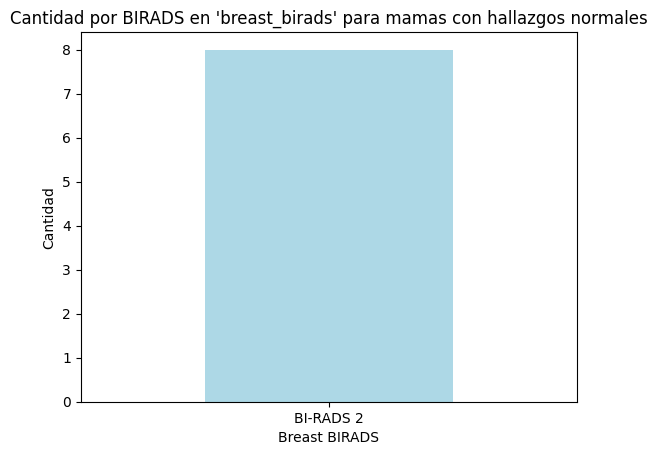

In [133]:
grouped = df.groupby(['study_id', 'laterality'])

# Lista para almacenar los índices de las mamas que cumplen con el criterio
indices_filtrados = []

for (study_id, laterality), group in grouped:
    # Verificar si todas las categorías de 'finding_categories' en el grupo están en 'normal_findings'
    if group['finding_categories'].apply(lambda x: set(x).issubset(set(normal_findings))).all():
        indices_filtrados.extend(group.index)

# Crear un DataFrame filtrado con los índices obtenidos
df_filtrado = df.loc[indices_filtrados]

# Contar las ocurrencias de cada valor de 'breast_birads'
conteo_birads = df_filtrado['breast_birads'].value_counts().sort_index()

# Graficar los resultados
conteo_birads.plot(kind='bar', color='lightblue')
plt.title("Cantidad por BIRADS en 'breast_birads' para mamas con hallazgos normales")
plt.xlabel("Breast BIRADS")
plt.ylabel("Cantidad")
plt.xticks(rotation=0)
plt.show()

#### Parte 2: Hallazgo sospechoso ####


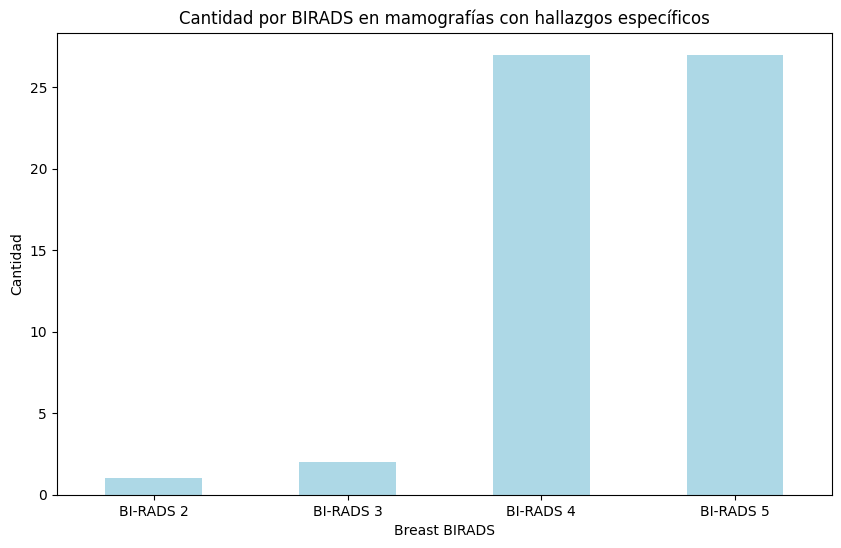

In [122]:
df_filtrado = df[df['finding_categories'].apply(lambda x: set(x).issubset(set(sus)))]

# Verificar si df_filtrado no está vacío
if not df_filtrado.empty:
    # Contar las ocurrencias en 'breast_birads'
    conteo_birads = df_filtrado['breast_birads'].value_counts().sort_index()
    
    # Graficar los resultados
    plt.figure(figsize=(10, 6))
    conteo_birads.plot(kind='bar', color='lightblue')
    plt.title("Cantidad por BIRADS en mamografías con hallazgos específicos")
    plt.xlabel("Breast BIRADS")
    plt.ylabel("Cantidad")
    plt.xticks(rotation=0)
    plt.show()
else:
    print("No se encontraron casos donde 'finding_categories' contenga exclusivamente los elementos de la lista 'finding'.")


In [97]:

finding = normal_findings + sus


['Nipple Retraction',
 'Skin Retraction',
 'Skin Thickening',
 'Suspicious Lymph Node']

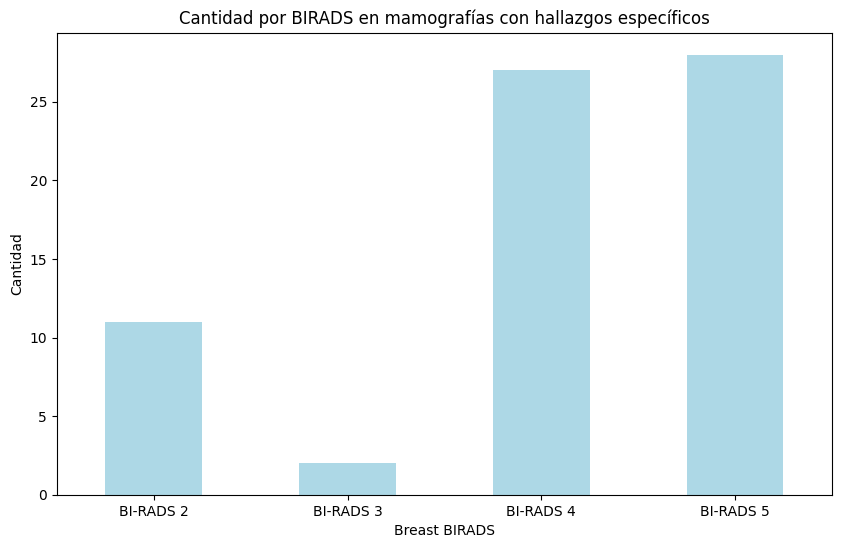

In [123]:
df_filtrado = df[df['finding_categories'].apply(lambda x: set(x).issubset(set(finding)))]

# Verificar si df_filtrado no está vacío
if not df_filtrado.empty:
    # Contar las ocurrencias en 'breast_birads'
    conteo_birads = df_filtrado['breast_birads'].value_counts().sort_index()
    
    # Graficar los resultados
    plt.figure(figsize=(10, 6))
    conteo_birads.plot(kind='bar', color='lightblue')
    plt.title("Cantidad por BIRADS en mamografías con hallazgos específicos")
    plt.xlabel("Breast BIRADS")
    plt.ylabel("Cantidad")
    plt.xticks(rotation=0)
    plt.show()
else:
    print("No se encontraron casos donde 'finding_categories' contenga exclusivamente los elementos de la lista 'finding'.")


Podemos observar que no es un sintoma menor, ya que si solo esta presente vemos que tiene mayor presencia en BI-Rads 4 y 5.

#### Parte 3: Hallazgos anormales ####

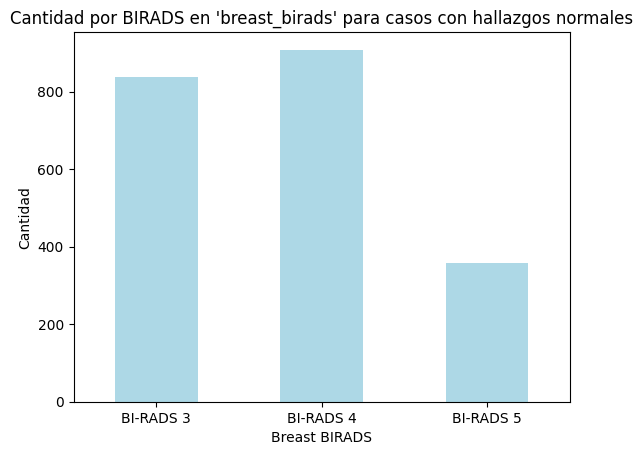

In [88]:
# Filtrar el DataFrame para incluir solo las filas donde 'finding_categories' contiene únicamente elementos de normal_findings
df_anormal = df[df['finding_categories'].apply(lambda x: set(x).issubset(set(anormal_findings)))]

# Verificar si df_normal no está vacío
if not df_anormal.empty:
    # Contar las ocurrencias en 'breast_birads'
    conteo_birads = df_anormal['breast_birads'].value_counts().sort_index()

    # Graficar los resultados
    conteo_birads.plot(kind='bar', color='lightblue')
    plt.title("Cantidad por BIRADS en 'breast_birads' para casos con hallazgos normales")
    plt.xlabel("Breast BIRADS")
    plt.ylabel("Cantidad")
    plt.xticks(rotation=0)
    plt.show()
else:
    print("No se encontraron casos donde 'finding_categories' contenga exclusivamente hallazgos normales.")


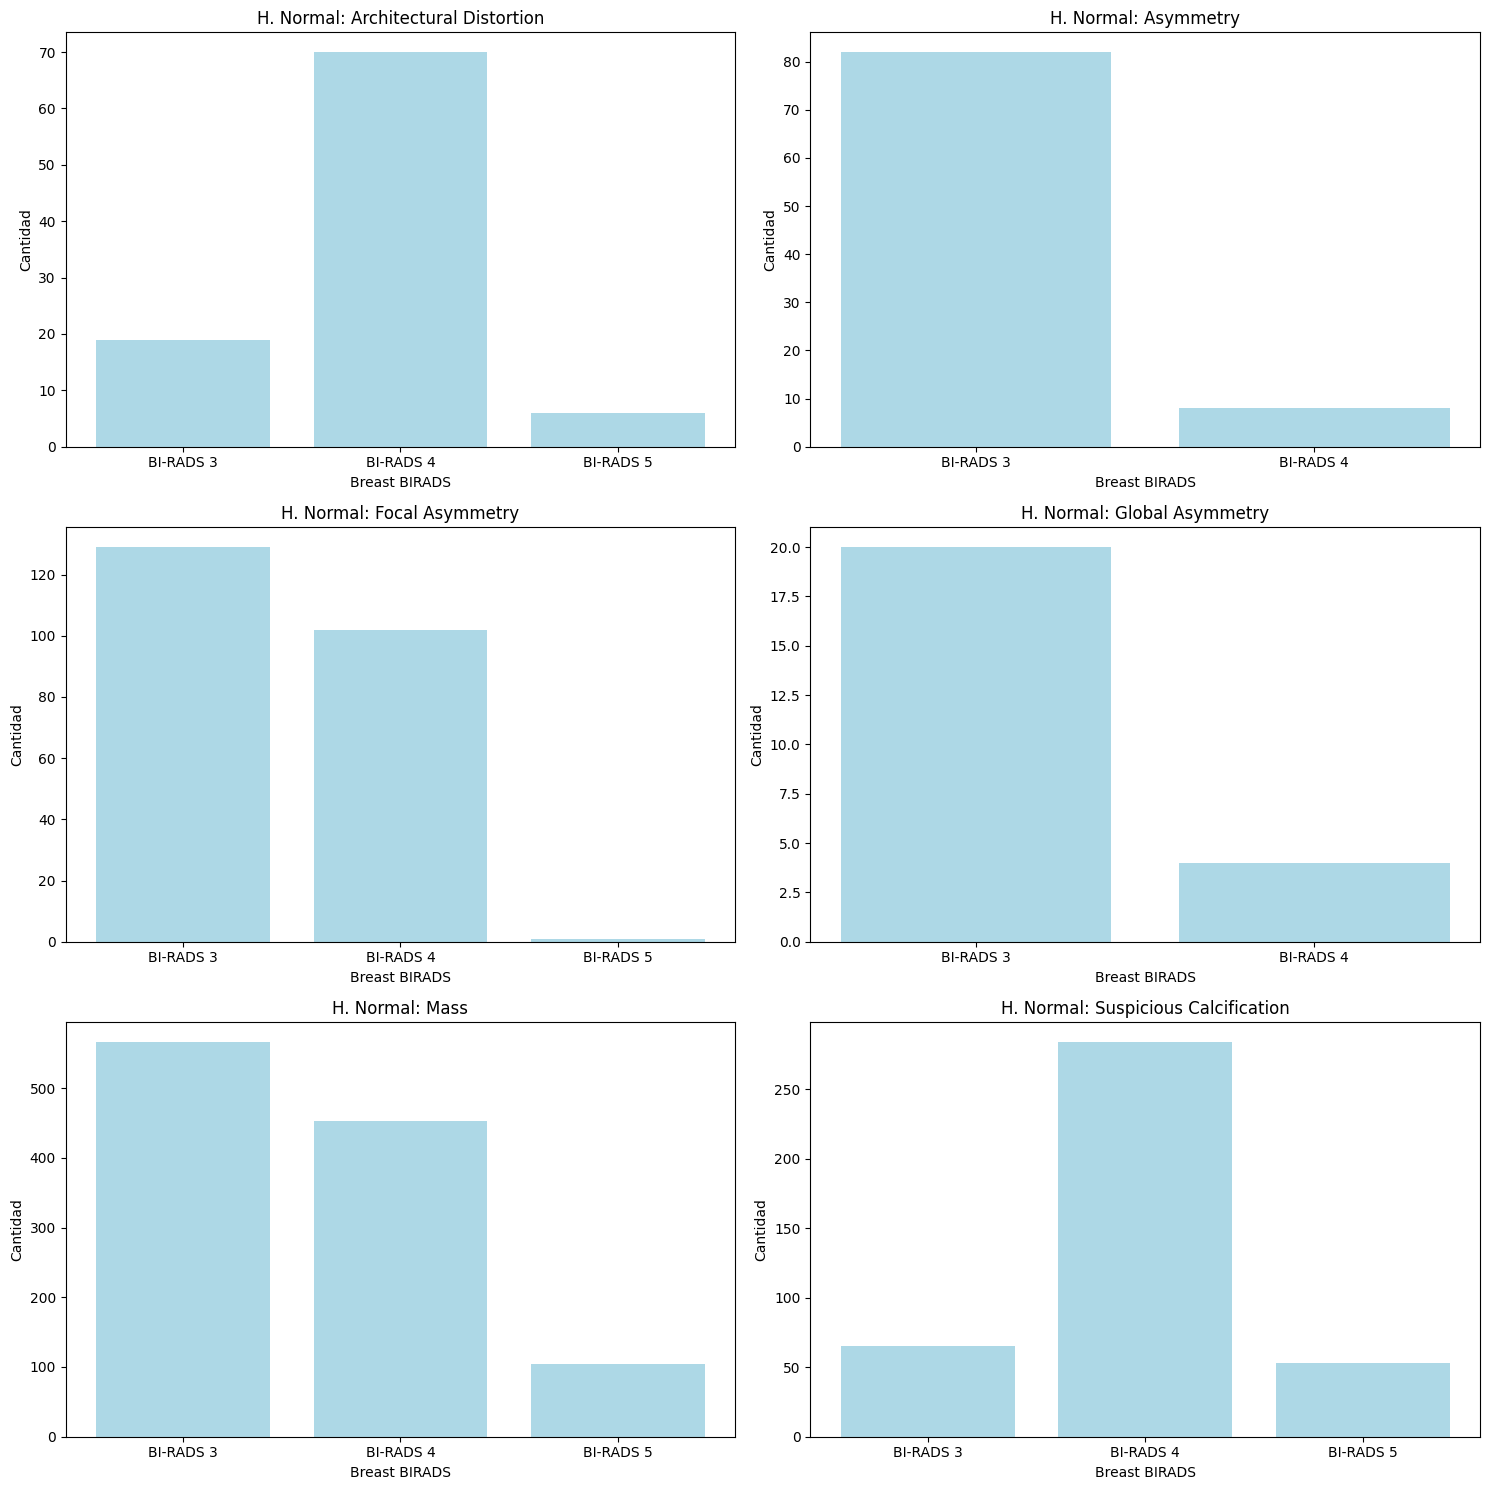

In [124]:
# Configurar la figura y los ejes para una cuadrícula de 3x2
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Aplanar el array de ejes para facilitar el acceso
axes = axes.flatten()

# Crear un gráfico para cada hallazgo normal
for i, hallazgo in enumerate(anormal_findings):
    # Filtrar el DataFrame para incluir solo las filas donde 'finding_categories' contiene exclusivamente el hallazgo actual
    df_filtrado = df[df['finding_categories'].apply(lambda x: set(x) == {hallazgo})]
    
    # Verificar si df_filtrado no está vacío
    if not df_filtrado.empty:
        # Contar las ocurrencias en 'breast_birads'
        conteo_birads = df_filtrado['finding_birads'].value_counts().sort_index()
        
        # Graficar los resultados en el subplot correspondiente
        axes[i].bar(conteo_birads.index, conteo_birads.values, color='lightblue')
        axes[i].set_title(f"H. Normal: {hallazgo}")
        axes[i].set_xlabel("Breast BIRADS")
        axes[i].set_ylabel("Cantidad")
        axes[i].tick_params(axis='x', rotation=0)
    else:
        axes[i].text(0.5, 0.5, f"No datos para: {hallazgo}", 
                     ha='center', va='center', fontsize=12, color='red')
        axes[i].set_title(f"H. Normal: {hallazgo}")



# Ajustar el layout
plt.tight_layout()
plt.show()

In [142]:
df['num_symptoms'] = df['finding_categories'].apply(len)

frecuencia_sintomas = df.groupby(['breast_birads', 'num_symptoms']).size().unstack(fill_value=0)

# Agregar la cantidad total de diagnósticos por nivel de BIRADS
total_diagnosticos = df['breast_birads'].value_counts().sort_index()

# Combinar la tabla de frecuencia de síntomas con la cantidad total de diagnósticos
resultado = frecuencia_sintomas.copy()
resultado.loc['Total'] = frecuencia_sintomas.sum()

resultado = resultado.join(total_diagnosticos.rename('Total Diagnósticos'))

# Mostrar la tabla con la frecuencia de síntomas y total de diagnósticos
print("Frecuencia de síntomas por nivel de BIRADS y total de diagnósticos:")
print(resultado)

# Mostrar los síntomas para cada combinación de BIRADS y cantidad de síntomas
for birads in df['breast_birads'].unique():
    print(f"\nSíntomas para {birads}:")
    sintomas_birads = df[df['breast_birads'] == birads][['num_symptoms', 'finding_categories']]
    sintomas_birads_grouped = sintomas_birads.groupby('num_symptoms')['finding_categories'].apply(lambda x: x.tolist()).to_dict()
    
    for num in sorted(sintomas_birads_grouped.keys()):
        sintomas_list = [item for sublist in sintomas_birads_grouped[num] for item in sublist]
        sintomas_unicos = sorted(set(sintomas_list))
        print(f"{num} síntoma(s): {', '.join(sintomas_unicos)}")

Frecuencia de síntomas por nivel de BIRADS y total de diagnósticos:
                   1    2   3  4  Total Diagnósticos
breast_birads                                       
BI-RADS 1      13406    0   0  0             13406.0
BI-RADS 2       4674    2   0  0              4676.0
BI-RADS 3        960   12   0  0               972.0
BI-RADS 4        939   60   6  0              1005.0
BI-RADS 5        333   81  11  2               427.0
Total          20312  155  17  2                 NaN

Síntomas para BI-RADS 4:
1 síntoma(s): Architectural Distortion, Asymmetry, Focal Asymmetry, Global Asymmetry, Mass, Nipple Retraction, No Finding, Skin Retraction, Skin Thickening, Suspicious Calcification, Suspicious Lymph Node
2 síntoma(s): Architectural Distortion, Asymmetry, Focal Asymmetry, Mass, Nipple Retraction, Skin Thickening, Suspicious Calcification
3 síntoma(s): Architectural Distortion, Global Asymmetry, Mass, Nipple Retraction, Skin Thickening, Suspicious Calcification

Síntomas para BI

In [146]:
df = pd.read_csv(archivo)

                               study_id                         series_id  \
0      48575a27b7c992427041a82fa750d3fa  26de4993fa6b8ae50a91c8baf49b92b0   
1      48575a27b7c992427041a82fa750d3fa  26de4993fa6b8ae50a91c8baf49b92b0   
2      75e8e48933289d70b407379a564f8594  853b70e7e6f39133497909d9ca4c756d   
3      75e8e48933289d70b407379a564f8594  853b70e7e6f39133497909d9ca4c756d   
4      c3487424fee1bdd4515b72dc3fd69813  77619c914263eae44e9099f1ce07192c   
...                                 ...                               ...   
20481  f2093a752e6b44df5990f5fd38c99dd2  2b1b2b8f48abab9819c0b3d091e152ee   
20482  b3c8969cd2accfa4dbb2aece1f7158ab  69d7f07ea04572dad5e5aa62fbcfc4b7   
20483  b3c8969cd2accfa4dbb2aece1f7158ab  69d7f07ea04572dad5e5aa62fbcfc4b7   
20484  b3c8969cd2accfa4dbb2aece1f7158ab  69d7f07ea04572dad5e5aa62fbcfc4b7   
20485  b3c8969cd2accfa4dbb2aece1f7158ab  69d7f07ea04572dad5e5aa62fbcfc4b7   

                               image_id laterality view_position  height  \

In [148]:
df['finding_birads'] = df['finding_birads'].apply(convertir_birads)

# Filtrar el DataFrame para incluir solo los registros donde finding_birads es 5
df_birads_5 = df[df['finding_birads'] == 5]

# Contar la frecuencia de cada finding_category
conteo_diagnosticos = df_birads_5['finding_categories'].explode().value_counts()

# Encontrar el finding_category más frecuente
if not conteo_diagnosticos.empty:
    finding_mas_frecuente = conteo_diagnosticos.idxmax()
    frecuencia = conteo_diagnosticos.max()
    print(f"El finding_category más frecuente cuando finding_birads es 5 es '{finding_mas_frecuente}' con una frecuencia de {frecuencia}.")
else:
    print("No se encontraron registros con finding_birads igual a 5.")

El finding_category más frecuente cuando finding_birads es 5 es '['Mass']' con una frecuencia de 104.


In [150]:
asus = anormal_findings + sus

In [152]:
anormal_findings = ['Nipple Retraction', 'Skin Retraction', 'Skin Thickening']  # Ajusta según sea necesario

# Filtrar el DataFrame para incluir solo los niveles de BIRADS 3, 4 y 5
df_birads_3_5 = df[df['finding_birads'].isin([3, 4, 5])]

# Verificar si hay datos disponibles
if df_birads_3_5.empty:
    print("No hay datos disponibles para los niveles de BIRADS 3, 4 y 5.")
else:
    # Crear una lista para almacenar los resultados
    resultados = []

    # Analizar para cada nivel de BIRADS (3, 4, 5)
    for birads in [3, 4, 5]:
        # Filtrar datos para el nivel de BIRADS actual
        df_birads = df_birads_3_5[df_birads_3_5['finding_birads'] == birads]
        
        # Contar la frecuencia de cada diagnóstico en 'finding_categories'
        conteo_diagnosticos = df_birads['finding_categories'].explode().value_counts()
        
        # Obtener los tres diagnósticos más frecuentes
        tres_mas_frecuentes = conteo_diagnosticos.head(3)
        
        # Convertir a DataFrame
        tres_mas_frecuentes_df = tres_mas_frecuentes.reset_index()
        tres_mas_frecuentes_df.columns = ['Diagnóstico', 'Frecuencia']
        tres_mas_frecuentes_df['BIRADS'] = birads
        
        # Agregar los resultados a la lista
        resultados.append(tres_mas_frecuentes_df)
    
    # Concatenar todos los resultados en un solo DataFrame
    tabla_resultados = pd.concat(resultados).reset_index(drop=True)
    
    # Mostrar la tabla con los diagnósticos más frecuentes por nivel de BIRADS
    pivot_table = tabla_resultados.pivot(index='Diagnóstico', columns='BIRADS', values='Frecuencia').fillna(0)
    
    print("Tabla de Diagnósticos Más Frecuentes para BIRADS 3, 4 y 5:")
    print(pivot_table)

Tabla de Diagnósticos Más Frecuentes para BIRADS 3, 4 y 5:
BIRADS                                    3      4      5
Diagnóstico                                              
['Asymmetry']                          82.0    0.0    0.0
['Focal Asymmetry']                   129.0  102.0    0.0
['Mass']                              566.0  453.0  104.0
['Suspicious Calcification', 'Mass']    0.0    0.0   46.0
['Suspicious Calcification']            0.0  284.0   53.0


Solo vemos datos en xmin, ymin, xmax, ymax en categorias distintas a la de "No Finding"

 ### *Densidad del seno y BI-Rads* ###


Entre más densos sean sus senos, más difícil pueden ser ver las áreas anormales en los mamogramas, tener senos más densos también incrementa el riesgo de llegar a tener un diagnóstico de cáncer mamario.

Se encontró una relación entre mientras más denso el tejido mayor probabilidad de riesgo de cáncer de mamas.